In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import random
from scipy.io import savemat,loadmat

In [2]:
def save_images_in_npy_file(pth):
    lista_licheni = os.listdir(pth)
    res = []
    lichene_type = []
    for i,lich in enumerate(lista_licheni):
        lista_immagini_pth = os.path.join(pth,lich)
        lista_immagini = os.listdir(lista_immagini_pth)
        for j,img in enumerate(lista_immagini):
            img_pth = os.path.join(lista_immagini_pth,img)
            immagine = cv2.imread(img_pth)
            immagine = cv2.cvtColor(immagine, cv2.COLOR_RGB2BGR)
            x_dim = immagine.shape[0]//10
            y_dim = immagine.shape[1]//10
            immagine = immagine[x_dim:immagine.shape[0] - x_dim,y_dim:immagine.shape[1] - y_dim,:]
            immagine = cv2.resize(immagine,(1000,1000))
            res.append(immagine)
            lichene_type.append(lich)
    res_fin = []
    res = np.array(res)
    for t in res:
        res_fin.append(t.astype(np.uint8))
    res_fin = np.array(res_fin)
    return res_fin, lichene_type

In [3]:
def create_4by4_images(res,lichene_type, nome_immagine):
    boxes = [[0,0,800,800],[800,0,800,800],[0 , 800, 800,800],[800,800,800,800]]
    file = {}
    zone = ['upper_left','upper_right','down_left','down_right']
    img_numb = random.sample(range(res.shape[0]),4)
    image = np.zeros([1600,1600,3])
    cord = [[0,800,0,800],[0, 800, 800, 1600],[800,1600,0 ,800],[800,1600,800,1600]]
    for i,numb in enumerate(img_numb):
        crd = cord[i]
        im = res[numb,:,:,:]
        file[zone[i]] = lichene_type[numb]
        image[crd[0]:crd[1],crd[2]:crd[3],:] = im[100:900,100:900,:]
    np.save("../../images_matlab_test/labels/" + nome_immagine +".npy", file)
    cv2.imwrite("../../images_matlab_test/images/" + nome_immagine +".jpg",cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_RGB2BGR))
    return file


## MARKDOWN

In [4]:
res, lichene_type = save_images_in_npy_file('../../lichens/train/') 

In [5]:
res.shape

(63, 1000, 1000, 3)

In [6]:
for ii in range(10):
    print(ii)
    nome_immagine = 'text_image_N' + str(ii+1)
    fl = create_4by4_images(res,lichene_type, nome_immagine)



0
1
2
3
4
5
6
7
8
9


In [ ]:
c = np.load('../../images_matlab_test/labels/text_image_N1.npy',allow_pickle=True)

In [ ]:
c = loadmat('../descriptors_text_image_N1.mat')

In [33]:
lista_immagini = ['../../lichens/train/Melanelixia_glabratula/texture02.jpg','../../lichens/train/Gyalolechia_flavorubescens/texture02.jpg','../../lichens/train/Candelariella_reflexa/texture02.jpg','../../lichens/train/Arthonia_radiata/texture01.jpg']
image = np.zeros([1600,1600,3])
cord = [[0,800,0,800],[0, 800, 800, 1600],[800,1600,0 ,800],[800,1600,800,1600]]
boxes = [[0,0,800,800],[800,0,800,800],[0 , 800, 800,800],[800,800,800,800]]
lich = ['Melanixia_glabratule','Gyalolechia_flavorubescens','Candelariella_reflexa','Arthonia_radiata']
zone = ['upper_left','upper_right','down_left','down_right']
file = {}
for i,img_pth in enumerate(lista_immagini):
    print(img_pth)
    crd = cord[i]
    img = cv2.imread(img_pth)
    
    immagine = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    x_dim = immagine.shape[0]//10
    y_dim = immagine.shape[1]//10
    immagine = immagine[x_dim:immagine.shape[0] - x_dim,y_dim:immagine.shape[1] - y_dim,:]
    immagine = cv2.resize(immagine,(1000,1000))
    image[crd[0]:crd[1],crd[2]:crd[3],:] = immagine[100:900,100:900,:]
    file[zone[i]] = lich[i]
    image = image.astype(np.uint8)
np.save('prova_labels',file)
cv2.imwrite("provaimg.jpg",cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_RGB2BGR))
    

../../lichens/train/Melanelixia_glabratula/texture02.jpg
../../lichens/train/Gyalolechia_flavorubescens/texture02.jpg
../../lichens/train/Candelariella_reflexa/texture02.jpg
../../lichens/train/Arthonia_radiata/texture01.jpg


True

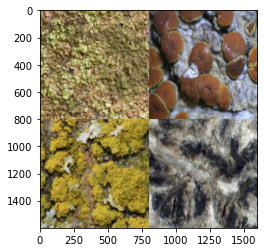

In [35]:
import matplotlib.pyplot as plt 


plt.imshow(image)

In [20]:
os.listdir('../../lichens/train/Melanelixia_glabratula')

['texture01.jpg', 'texture02.jpg', 'texture03.jpg']